In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
beak_1975 = pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/finch_beak_1975.csv')
beak_2012 = pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/finch_beak_2012.csv')

In [33]:
print(beak_1975.shape)
#print(beak_1975.head())`
#print(beak_1975[['Beak length, mm','Beak depth, mm']])
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

def bootstrap_replicate_1d(data, func):
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
        
    return bs_replicates

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
#covariance/(std of x)*(std of y)
    # Return entry [0,1]
    return corr_mat[0,1]


def loadBeakData(df_source, df_target, year,depthFieldName,lengthFieldName):
    for i in range(len(df_source)):
        df_target = df_target.append({'beak_depth': df_source.iloc[i][depthFieldName],
                        'beak_length': df_source.iloc[i][lengthFieldName],
                        'year': year
                       }, ignore_index=True)
    return df_target
    
df=pd.DataFrame(columns=['beak_depth','beak_length','year'])


df=loadBeakData(beak_1975,df,1975,'Beak depth, mm','Beak length, mm')
df=loadBeakData(beak_2012,df,2012, 'bdepth','blength')

df['year']=df['year'].astype(int)

print(df)
#print(df[df['year']==2012.0].head(100))

(403, 4)
     beak_depth  beak_length  year
0           8.0          9.4  1975
1           8.3          9.2  1975
2           7.5          9.5  1975
3           8.0          9.5  1975
4           9.9         11.5  1975
..          ...          ...   ...
646         9.3         14.2  2012
647         9.8         13.0  2012
648         8.9         14.6  2012
649         9.8         13.1  2012
650         9.1         15.2  2012

[651 rows x 3 columns]


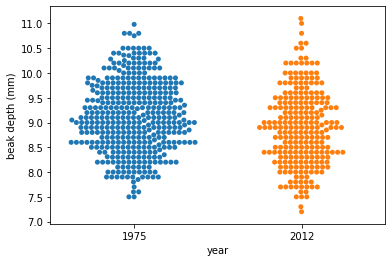

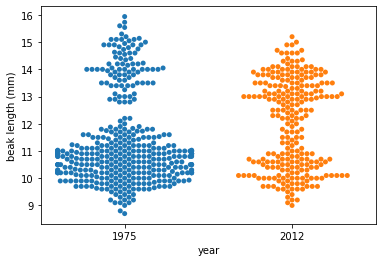

In [4]:
_ = sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
# Show the plot
plt.show()

_ = sns.swarmplot(x='year', y='beak_length', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak length (mm)')
# Show the plot
plt.show()

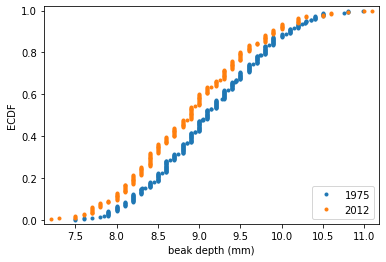

In [35]:
# Compute ECDFs
bd_1975=df[df['year']==1975]['beak_depth'].values
bd_2012=df[df['year']==2012]['beak_depth'].values

bl_1975=df[df['year']==1975]['beak_length'].values
bl_2012=df[df['year']==2012]['beak_length'].values

x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

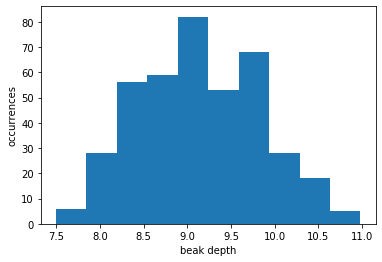

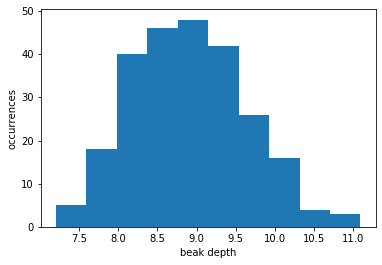

In [36]:
_ = plt.hist(bd_1975)
_ = plt.xlabel('beak depth')
_ = plt.ylabel('occurrences')
plt.show()

_ = plt.hist(bd_2012)
_ = plt.xlabel('beak depth')
_ = plt.ylabel('occurrences')
plt.show()



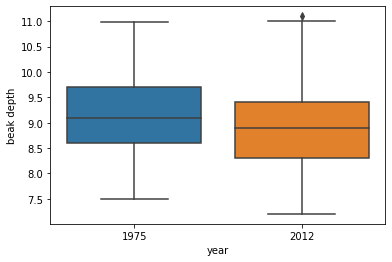

In [37]:
_ = sns.boxplot(x='year', y='beak_depth',
data=df)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth')
plt.show()

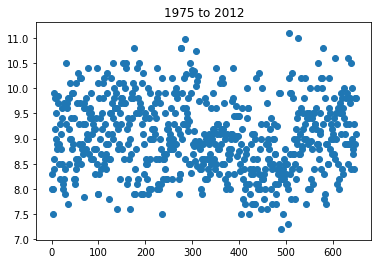

In [38]:
plt.scatter(x=range(len(df)), y='beak_depth',data=df)
plt.title('1975 to 2012')
plt.show()

In [39]:
#1.) Variablity represents the spread of the data
#2.) Variance is a way to quantify the spread of the data.  Variance is the mean squared distance of the data from their mean
#3.) variance=(x-x_mean) ** 2 / n
print("1975 beak variance",np.std(bd_1975))
print("2012 beak variance",np.std(bd_2012))

1975 beak variance 0.7078575426839536
2012 beak variance 0.7559922559808517


In [40]:
r_obs=pearson_r(df['beak_depth'],df['beak_length'])
print("observed:",r_obs)
print("low")

observed: 0.331494872113862
low


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


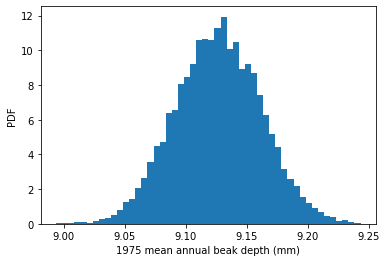

95% confidence interval = [9.0582134  9.19551241]  2012 beak depth
SEM: 0.037658656635765245


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


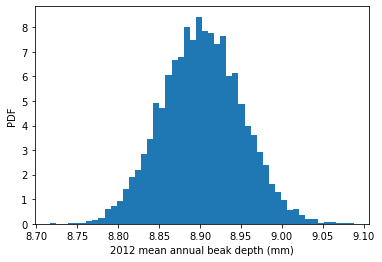

95% confidence interval = [8.80826613 8.99717742]  1975 beak depth
SEM: 0.048005556260364346
if the tail to right or left is longer than the data is not normally distributed.


In [41]:

#if we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.
bs_replicates = draw_bs_reps(bd_1975, np.mean, size=10000)

# Compute and print SEM
sem = np.std(bd_2012) / np.sqrt(len(bd_1975))


# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
#print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('1975 mean annual beak depth (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =',conf_int, ' 2012 beak depth')
print("SEM:",sem)


#if we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.
bs_replicates = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute and print SEM
sem = np.std(bd_2012) / np.sqrt(len(bd_2012))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
#print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('2012 mean annual beak depth (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =',conf_int, ' 1975 beak depth')
print("SEM:",sem)

print("if the tail to right or left is longer than the data is not normally distributed.")


In [42]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_1975)-np.mean(bd_2012)

print(mean_diff)
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_1975-bs_replicates_2012

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

0.22313275434243174
difference of means = 0.22313275434243174 mm
95% confidence interval = [0.10638888 0.34102187] mm


In [43]:
combined_mean=np.mean(np.concatenate((bd_1975,bd_2012)))
print("combined mean:", combined_mean)


bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

bs_diff_replicates = bs_replicates_2012-bs_replicates_1975  
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print('p-value =', p)

combined mean: 9.040952380952382
p-value = 0.0


Analysis to compare beak length with beak depth


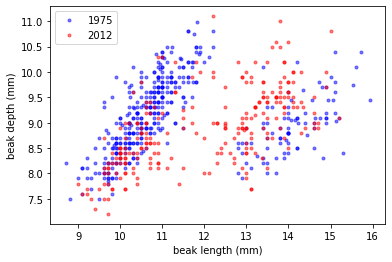

In [44]:
print("Analysis to compare beak length with beak depth")
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

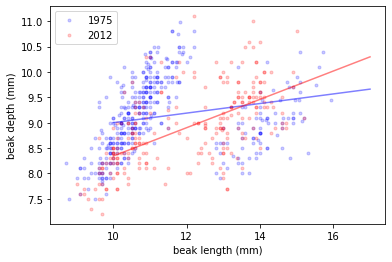

The slopes of the lines are roughly the same
1975: slope = 0.0945968320892116 conf int = [0.05392719 0.13591362]
1975: intercept = 8.053907980716424 conf int = [7.58370036 8.53345638]
2012: slope = 0.279421483961125 conf int = [0.23812917 0.31973925]
2012: intercept = 5.548559204612315 conf int = [5.08783683 6.04674887]


In [52]:
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012, 1)

x = np.array([10,17])
y1 = slope_1975 * x + intercept_1975
y2 = slope_2012 * x + intercept_2012

_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.2)

_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.2)

_ = plt.plot(x,y1,alpha=0.5, color='blue')
_ = plt.plot(x,y2,color='red',alpha=0.5)

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
plt.show()


bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

print("The slopes of the lines are roughly the same")

print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

In [53]:
#Beak length to depth ratio
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012
# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)
# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)
# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])
# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.2461609991094327 conf int = [1.22268289 1.27049845]
2012: mean ratio = 1.3483617710027853 conf int = [1.32468213 1.37309371]
